# REDES SOCIALES

* [LinkedIn](https://www.linkedin.com/in/frankromerot/)
* [GitHub](https://github.com/FrankRomeroT)
* [Tiktok](https://www.tiktok.com/@datafrank)

# 1. Preparación de librerias y carga de datos

**1.1 Importación de librerias**

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**1.2 Carga de datos**

In [134]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Zomato Dataset - 1.csv', sep = ',')

In [135]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-07-2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,26-07-2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,27-07-2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,28-07-2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,29-07-2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [136]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
693,15-05-2024,188.800003,193.399994,183.149994,192.000000,192.000000,44772997
694,16-05-2024,192.899994,195.850006,189.000000,195.199997,195.199997,35478593
695,17-05-2024,195.149994,196.000000,193.100006,194.850006,194.850006,20841351
696,21-05-2024,194.399994,196.500000,188.750000,189.100006,189.100006,33453174
697,22-05-2024,190.000000,190.000000,183.350006,185.500000,185.500000,40354936


# 2. Analisis Inicial

**2.1 Analisis del dataset**

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       698 non-null    object 
 1   Open       698 non-null    float64
 2   High       698 non-null    float64
 3   Low        698 non-null    float64
 4   Close      698 non-null    float64
 5   Adj Close  698 non-null    float64
 6   Volume     698 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 38.3+ KB


In [138]:
df2 = df.copy()

In [139]:
print("Observamos que la columna 'Date' está en formato 'object'. Por lo tanto, se debe cambiar a 'datetime64' para poder analizarla con mayor precisión.")

Observamos que la columna 'Date' está en formato 'object'. Por lo tanto, se debe cambiar a 'datetime64' para poder analizarla con mayor precisión.


In [140]:
df2['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       698 non-null    datetime64[ns]
 1   Open       698 non-null    float64       
 2   High       698 non-null    float64       
 3   Low        698 non-null    float64       
 4   Close      698 non-null    float64       
 5   Adj Close  698 non-null    float64       
 6   Volume     698 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 38.3 KB


In [141]:
df2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >, <Axes: >]],
      dtype=object)

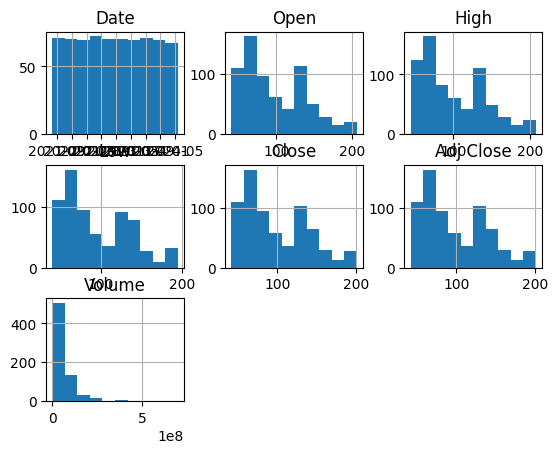

In [144]:
df2.hist()

# 3. Analisis del dataframe

In [145]:
df_year = df2['Date']

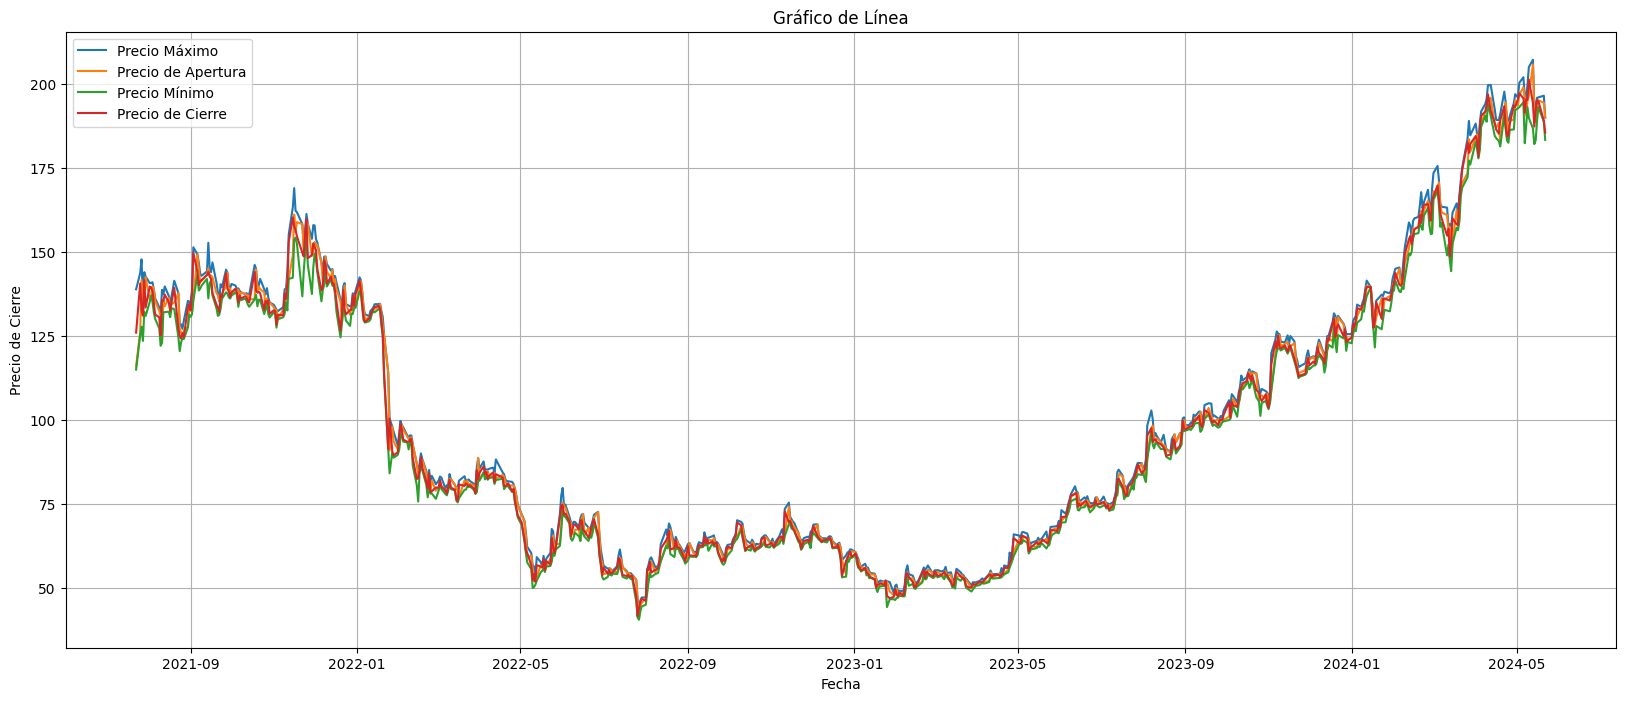

In [146]:
plt.figure(figsize=(20, 8))

plt.plot(df2['Date'], df2['High'], label='Precio Máximo', marker='')
plt.plot(df2['Date'], df2['Open'], label='Precio de Apertura', marker='')
plt.plot(df2['Date'], df2['Low'], label='Precio Mínimo', marker='')
plt.plot(df2['Date'], df2['Close'], label='Precio de Cierre', marker='')
plt.title("Gráfico de Línea")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.show()

In [147]:
df2['Price'] = df2[['High', 'Open', 'Low', 'Close']].sum(axis=1)

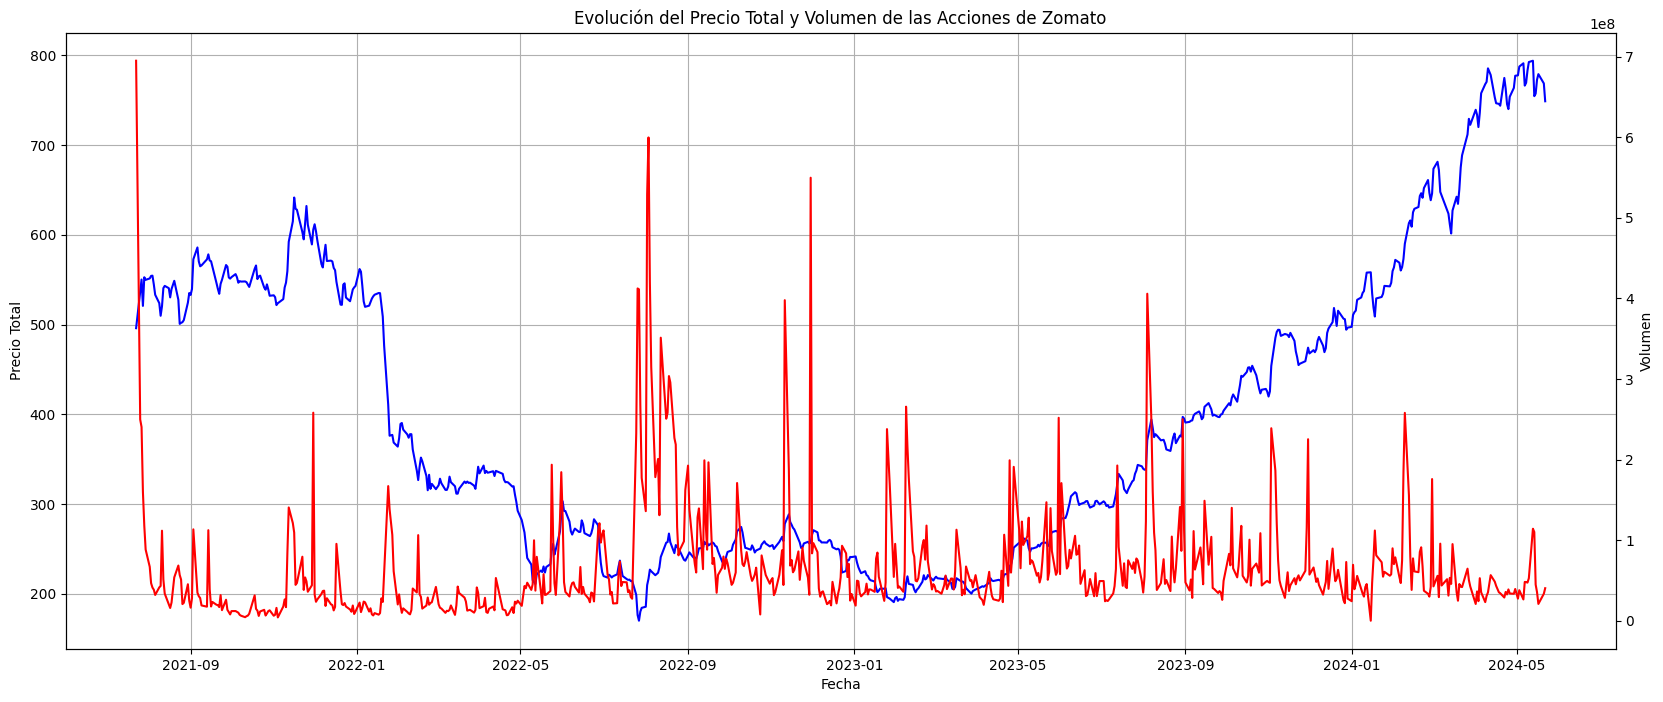

In [149]:
fig, ax1 = plt.subplots(figsize=(20, 8))

# 1
ax1.plot(df2['Date'], df2['Price'], label='Precio Total',color ='blue')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio Total')
ax1.tick_params(axis='y')

# 2
ax2 = ax1.twinx()
ax2.plot(df2['Date'], df2['Volume'], label='Volumen',color ='red')
ax2.set_ylabel('Volumen')
ax2.tick_params(axis='y')

plt.title("Evolución del Precio Total y Volumen de las Acciones de Zomato")
ax1.grid(True)

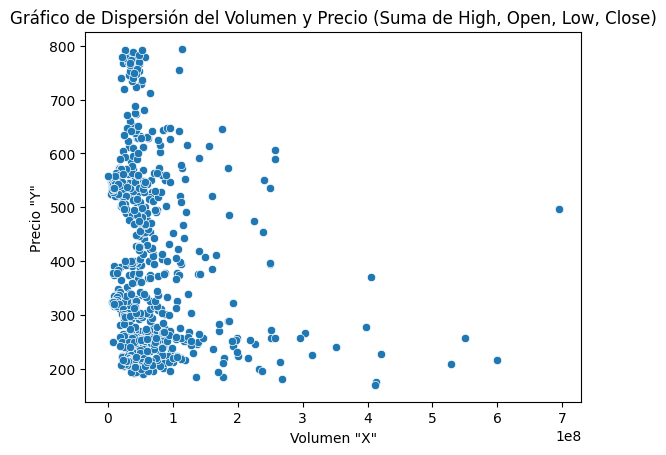

In [151]:
sns.scatterplot(data=df2, x='Volume', y='Price')
plt.xlabel('Volumen "X"')
plt.ylabel('Precio "Y"')
plt.title('Gráfico de Dispersión del Volumen y Precio (Suma de High, Open, Low, Close)')
plt.show()